<a href="https://colab.research.google.com/github/Aditi-0209/Startup-Funding-Analytics/blob/main/Startup_Funding_Analytics_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## Question 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  **Bangalore, Mumbai, and NCR**. As a friend, you want to help your friend deciding the location. NCR include **Gurgaon, Noida and New Delhi**. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [3]:
ques1 = df.copy()

In [4]:
ques1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [5]:
ques1.dropna(inplace=True, subset = ['CityLocation'])

In [6]:
ques1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2193 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2193 non-null   int64 
 1   Date              2193 non-null   object
 2   StartupName       2193 non-null   object
 3   IndustryVertical  2193 non-null   object
 4   SubVertical       1431 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2185 non-null   object
 7   InvestmentType    2192 non-null   object
 8   AmountInUSD       1390 non-null   object
 9   Remarks           349 non-null    object
dtypes: int64(1), object(9)
memory usage: 188.5+ KB


In [7]:
#following function helps to give primary city in X/Y type of city location
def prime_city(city):
  return city.split('/')[0].strip()

In [8]:
prime_city('Delhi /SF')   #strip function spaces bhi  hata deta hai
#'Delhi' and 'Delhi ' same hi rahega bcoz of strip

'Delhi'

In [9]:
ques1['CityLocation'].replace('bangalore','Banagalore',inplace=True)
ques1['CityLocation'].replace('New Delhi','Delhi',inplace=True)

In [10]:
ques1['CityLocation'] = ques1['CityLocation'].apply(prime_city)

In [11]:
ques1['CityLocation'].unique()

array(['Bangalore', 'Mumbai', 'Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Banagalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Hubli', 'Kerala',
       'Kozhikode', 'US', 'Coimbatore', 'Siliguri', 'USA', 'Lucknow',
       'Kanpur', 'SFO', 'London', 'Seattle', 'Varanasi', 'Bhopal',
       'New Delhi', 'Jodhpur', 'Boston', 'Belgaum', 'New York', 'Nagpur',
       'India', 'Udaipur', 'Dallas'], dtype=object)

In [12]:
temp = ques1[(ques1['CityLocation']=='Bangalore') | (ques1['CityLocation']=='Mumbai') | (ques1['CityLocation']=='Delhi') | (ques1['CityLocation']=='Gurgaon') | (ques1['CityLocation']=='Noida')]

In [13]:
temp

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2194,2194,29/04/2015,ReGlobe,Used Gadgets Buy / Refurbishing,NaN,Gurgaon,"Bessemer Ventures, Blume Ventures",Seed Funding,"1,000,000",NaN
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2197,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN


In [14]:
x = temp['CityLocation'].value_counts()
x

,count
CityLocation,
Bangalore,634
Mumbai,449
Delhi,385
Gurgaon,241
Noida,79


In [15]:
#plot bar graph
import matplotlib.pyplot as plt

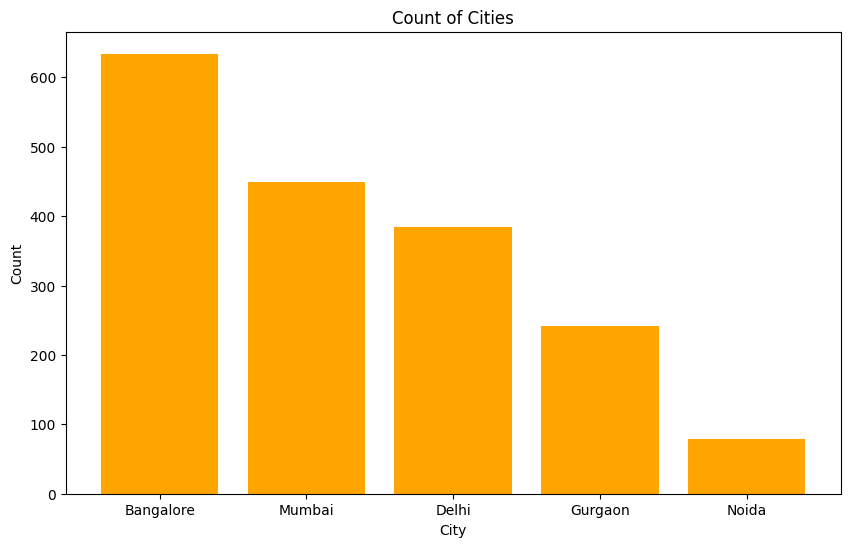

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(x.index, x.values, color='orange')

# Add title and labels
plt.title('Count of Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

## Question 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [17]:
ques2 = df.copy()

In [18]:
len(ques2['InvestorsName'].unique())

1886

In [19]:
#saare investors ke naam chahiye and unhone kitni baar invest kiya hai wo
#pata karna hai abhi

In [20]:
ques2['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors', inplace=True)
ques2['InvestorsName'].replace('Undisclosed Investors', '', inplace=True)
ques2.dropna(inplace=True, subset=['InvestorsName'])

In [21]:
ques2.reset_index(drop = True, inplace = True)
#drop = True  isliyekar rahe hain jisse ek naya column na bane for indexing
#purana index waala column hi update ho and koi naya column na ban jaaye index ka


In [22]:
ques2

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2359,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2360,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2361,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2362,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [23]:
def build_dict(array):
  #initiating dictionary
  d ={}
  for i in array:
    if ',' not in i and i!='':
      d[i] = d.get(i,0) + 1
    else:
      string = i.strip().split(',')
      for j in string:
        if j!='':
          d[j.strip()] = d.get(j.strip(),0) + 1
  return d

In [24]:
investor_dict = build_dict(ques2['InvestorsName'])

In [25]:
investor_data = pd.DataFrame(list(investor_dict.values()), list(investor_dict.keys()))

In [26]:
investor_data

,0
Kae Capital,22
Triton Investment Advisors,1
Kashyap Deorah,3
Anand Sankeshwar,2
Deepak Jain,1
...,...
Asia Pacific Internet Group,1
KARSEMVEN Fund,1
Exfinity Fund,1
GrowX Ventures.,1


In [45]:
investor_data = investor_data.sort_values(by = [0], ascending = False).head(5)
investor_data
investors = pd.DataFrame(investor_data)

## Question 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [47]:
ques3 = df.copy()

In [48]:
ques3['InvestorsName'].replace('Undisclosed investors', 'Undisclosed Investors', inplace = True)
ques3['InvestorsName'].replace('Undisclosed Investors', '', inplace = True)

In [49]:
df['StartupName'] = df['StartupName'].str.replace('Ola Cabs','Ola', case=False)
df['StartupName'] = df['StartupName'].str.replace('Olacabs','Ola', case=False)

df['StartupName'] = df['StartupName'].str.replace('Oyo Rooms','Oyo', case=False)
df['StartupName'] = df['StartupName'].str.replace('OyoRooms','Oyo', case=False)
df['StartupName'] = df['StartupName'].str.replace('OYOfit','Oyo', case=False)
df['StartupName'] = df['StartupName'].str.replace('Oyorooms','Oyo', case=False)
df['StartupName'] = df['StartupName'].str.replace('Oyo Rooms','Oyo', case=False)
df['StartupName'] = df['StartupName'].str.replace('OYO Rooms','Oyo', case=False)

df['StartupName'] = df['StartupName'].str.replace('Flipkart.com','Flipkart', case=False)
df['StartupName'] = df['StartupName'].str.replace('Paytm Marketplace','Paytm', case=False)


In [50]:
ques3.dropna(subset = ['StartupName', 'InvestorsName'], inplace = True)
ques3.reset_index(drop=True, inplace=True)

In [51]:
def creat_dict(startname, investor_name):
  cnt={} # Investor name -> unique number of investment
  name_startup = {} #Investor name -> list of companies invested
  n = len(investor_name) #row size
  for idx in range(n): #loop through each row
    i = investor_name[idx].strip()
    name = startname[idx].strip()
    if ',' not in i and i!='':
      if name_startup.get(i) is None:
        cnt[i] = 1
        li = []
        li.append(name)
        name_startup[i] = li
      else:
        li = name_startup[i]
        if name not in li:
          cnt[i] = cnt.get(i,0) + 1
          li.append(name)
          name_startup[i] = li
    else:
      string = i.strip().split(',')
      for j in string:
        k=j.strip()
        if k!= "":
          if name_startup.get(k) is None:
            cnt[k] = 1
            li = []
            li.append(name)
            name_startup[k] = li
          else:
            li = name_startup[k]
            if name not in li:
              cnt[k] = cnt.get(k,0) + 1
              li.append(name)
              name_startup[k] = li
  return cnt



In [52]:
unique_startup = creat_dict(ques3['StartupName'], ques3['InvestorsName'])

In [53]:
unique_investor_data = pd.DataFrame(list(unique_startup.values()), list(unique_startup.keys()))
unique_investor_data

,0
Kae Capital,20
Triton Investment Advisors,1
Kashyap Deorah,3
Anand Sankeshwar,2
Deepak Jain,1
...,...
Asia Pacific Internet Group,1
KARSEMVEN Fund,1
Exfinity Fund,1
GrowX Ventures.,1


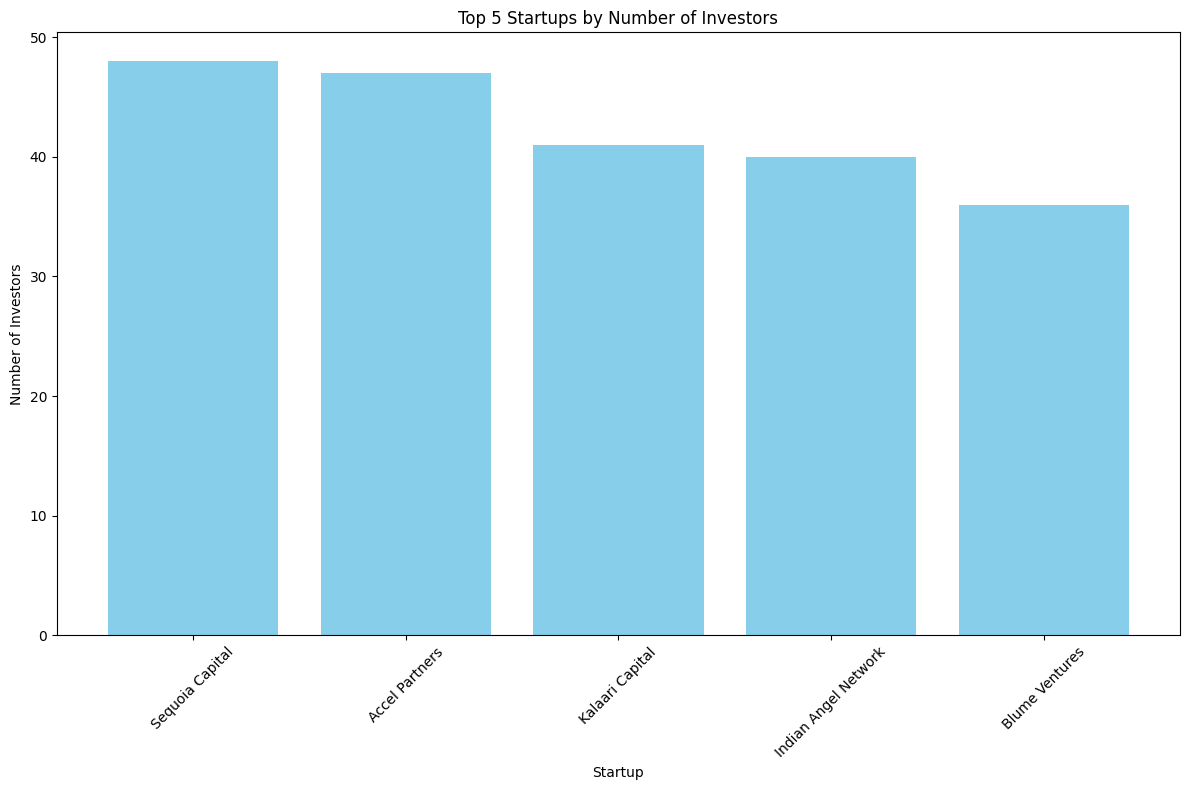

In [54]:
unique_investor_data = unique_investor_data.reset_index()
unique_investor_data.columns = ['Startup', 'Count']

# Sort DataFrame by 'Count' and select top 5
top_startups = unique_investor_data.sort_values(by='Count', ascending=False).head(5)

# Plot the bar graph
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.bar(top_startups['Startup'], top_startups['Count'], color='skyblue')

# Add title and labels
plt.title('Top 5 Startups by Number of Investors')
plt.xlabel('Startup')
plt.ylabel('Number of Investors')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

## Question 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [68]:
ques4 = df.copy()

In [69]:
ques4['InvestorsName'].replace('Undisclosed investors', 'Undisclosed Investors', inplace = True)
ques4['InvestorsName'].replace('Undisclosed Investors', '', inplace = True)

In [70]:
ques4['StartupName'].replace('Ola Cabs','Ola', inplace=True)
ques4['StartupName'].replace('Olacabs','Ola', inplace=True)

ques4['StartupName'].replace('Oyo Rooms','Oyo', inplace=True)
ques4['StartupName'].replace('OyoRooms','Oyo', inplace=True)
ques4['StartupName'].replace('OYOfit','Oyo', inplace=True)
ques4['StartupName'].replace('Oyorooms','Oyo', inplace=True)
ques4['StartupName'].replace('Oyo Rooms','Oyo', inplace=True)
ques4['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

ques4['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
ques4['StartupName'].replace('Paytm Marketplace','Paytm', inplace=True)


In [71]:
ques4['InvestmentType'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [72]:
ques4['InvestmentType'].replace("PrivateEquity", "Private Equity", inplace = True)
ques4['InvestmentType'].replace("Crowd funding", "Crowd Funding", inplace = True)
ques4['InvestmentType'].replace("SeedFunding", "Seed Funding", inplace = True)

In [73]:
ques4.dropna(subset = ['StartupName','InvestorsName','InvestmentType'], inplace = True)
ques4.reset_index(drop= True, inplace = True)

In [74]:
def create_dict(startname, investor_name,InvestmentType, lookup ):
    cnt = {} # Investor name -> unique number of investment
    name_startup = {} # Investor name -> list of companies invested.
    n = len(investor_name) # row size
    for idx in range(n): # loop through each row
        type_investment = InvestmentType[idx].strip()
        if type_investment not in lookup:
            continue

        i = investor_name[idx].strip()  #
        name = startname[idx].strip()
        if ',' not in i and i != '':
            if name_startup.get(i) is None:
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li
            else:
                li = name_startup[i]
                if name not in li:
                    cnt[i] = cnt.get(i,0) + 1
                    li.append(name)
                    name_startup[i] = li
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:
                            cnt[k] = cnt.get(k,0) + 1
                            li.append(name)
                            name_startup[k] = li
    return cnt


In [75]:
invest_type_investors = create_dict(ques4['StartupName'],ques4['InvestorsName'], ques4['InvestmentType'], ['Crowd Funding', 'Seed Funding'])
invest_type_investors

{'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 14,
 'LetsVenture': 16,
 'Anupam Mittal': 16,
 'Hetal Sonpal': 1,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Blume Ventures': 10,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 3,
 'Ashish Gupta': 5,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'India Quotient': 10,
 'Shunwei Capital': 1,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures': 1,
 'Venture Catalysts': 5,
 'Sourav Ganguly': 1,
 'Ankit Aditya': 1,
 'Moksh Sports Ventures': 1,
 'Fireside Ventures': 4,
 'Apurva Salarpuria': 1,
 'Sidharth Pansari': 2,
 'Sprout Capital': 1,
 '500 Startups': 11,
 'Purvi Capital': 2,
 'Rajan Anandan': 23,
 'Abhishek Gupta': 1,
 'Indian Angel Network': 33,
 'Brigade Innovations LLP': 1,
 'TV Mohandas Pai': 10,
 'Suhail Rahman

In [76]:
invest_type_investors_data  = pd.DataFrame(list(invest_type_investors.values()), list(invest_type_investors.keys()))
invest_type_investors_data.sort_values(by = [0], ascending = False)


,0
Indian Angel Network,33
Rajan Anandan,23
LetsVenture,16
Anupam Mittal,16
Group of Angel Investors,14
...,...
Mohit Lalvani,1
Kamal Puri,1
Vineet Taneja,1
Rohit Chokhani,1
